# Iris Flower Classification

## Main Goals

- Preprocess the dataset
    - Examine and analyze data
    - One-hot encode categorical labels
    - Create polynomial features 
    - Scale continous variables

- Classify iris species based on petal and sepal measurements
    - Do this through a logistic regression model




### Context

The Iris dataset is one of the most well known and frequently used datasets in the field of machine learning and statistics. First introduced by the British statistician and biologist Ronald A. Fisher in 1936, it contains measurements of 150 iris flowers, representing three different species: Iris setosa, Iris versicolor, and Iris virginica. Each observation includes the lengths and widths of the petals and sepals, making it ideal for exploring classification techniques and feature engineering. Over the decades, the Iris dataset has become a standard benchmark for testing algorithms and demonstrating fundamental concepts in data science, owing to its simplicity, balanced classes, and clear real-world relevance to biological classification.

We will be using the Iris dataset from the Sklearn library for the purposes of this project. Documentation and information about the dataset can be found here: [scikit-learn: Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

## 1. Data Loading

We'll start off by importing both the Iris data set from the Sklearn library, as well as importing pandas. pandas is important is it allows us to use dataframes and various useful features, so many projects start with importing pandas. From there, we can display the data to get a better understanding of the dataset.


In [ ]:
#Import necessary libraries. Pandas for the dataframe, and sklearn for the dataset.
import pandas as pd
from sklearn.datasets import load_iris

#load the iris dataset
iris = load_iris(as_frame=True)

#display the iris dataset
display(iris)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

After displaying the data, we can see that this dataset is holding both a dataframe and a series. Refering to Sklearn's documentation on the load_iris function, we can see that this is actually a special data type called a bunch. This acts similarly to a dictionary, but it can contain datasets and relevant metadata. In our case, it contains a dataframe and a series. 

### Understanding the data

While displaying the data does give us a good idea of what we're working with, there are still some questions unanswered. For starters, the series returns a 0, 1, or 2 depending on the type of Iris flower it is, but we don't know which flower corresponds to which number.

Referring to the documentation, there are certain aspects of this bunch we can view, such as just the target names. 

In [50]:
#View the target names
#This will give us the names of the species and the features of the dataset
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Displaying the target names shows that the names in order are setosa, versicolor, and virginica. Likely relating to the indices of the series in the bunch, meaning that 0. is setosa, 1 is versicolor, and 2 is virginica. We'll keep this in mind for now.

## 2. Preprocessing

After taking a look and understanding what we are working with, it is time to preprocess the data. Since our data isn't neatly in a dataframe, we can start by spliting the unique bunch into a dataframe and a series, for the features and target repsectively. Keeping the the features and target separate allows us to work on the features without worry of accidentally modifying our target. In this case, the target would be the specific kind of Iris flower that a specific row represents.

According to the documentation, the .data function in this bunch will return just the dataframe, and .target will return just the series. We will use this to split the data for now.

In [51]:
#Split the data based on
df = iris.data
target = iris.target

#inspect our newly separated data
display(df)
display(target)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


### Checking for Null Entries

Now that our data is separated, the next thing to check before any other kind of preprocessing is null values. While the Iris dataset is a very well-established dataset in data science, it is still important to always check for any null values just to be safe. This goes for all projects where you are working with a dataset that doesn't explicitly state that the data is not missing anything.

In [52]:
#Check for null values in the dataset
print(df.isnull().sum())

#Check for null values in the target
print(target.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
0


Fortunately for us, there are no missing entries in either the target or data. We can safely move to the next phase of preprocessing.


### Encoding Categorical Labels through One-Hot Encoding

While the features in the dataframe are in great condition, the target could be improved upon. At first glance, it isn't exactly clear as to which flower type is being refered to in each number.

We can solve this problem with a technique called One-Hot encoding, where we create new columns for each category, with a value of 1 or 0 depending on whether the observation belongs to that category. In this case, it would create a new feature for each kind of Iris flower. Thankfully, pandas has a function to do this kind of encoding for us. From there, we can attempt to rename the columns for clarity.

While this will create clarity for us, the target are actually in a good position for a logistic regression model, since they are already in a series. Later on, when we create our logisitic regression model, we will use the original target series. 

As a data-scientist however, it is good practice to know how to encode categorical labels, and how to one-hot encode becomes especially useful in more advanced projects with complex datasets. The targets in this dataset are good for practice as such. 

Note that by default, pd.get_dummies returns a dataframe that contains boolean entries. Since models are able to read numerical values more often than other datatypes, we'll also go ahead and convert the encoded dataframe to integer entries

In [53]:
#First, let's use pd.get_dummies from pandas to One-hot encode the target.
target_encoded = pd.get_dummies(target).astype(int)

#First we can create a dictionary that maps the target names to their respective indices
target_names = dict(zip([0, 1, 2], iris.target_names))

#Then we can rename the columns of the encoded target dataframe to the target names
target_encoded = target_encoded.rename(columns=target_names)

#Now, let's inspect the newly created one-hot encoded target
display(target_encoded)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


Good work! The targets are now easier to understand, labeled, and in a format that is easy to understand. Again, this is good practice for learning how to One-hot encode, and will help us build a foundation of skills necessary as a data scientist. We can now build some graphs to further understand patterns.

## 3. Graphing 

Before diving into modeling or splitting data, it’s important to again get a feel for what’s actually in the data. By visualizing the iris measurements, we can spot patterns, clusters, or outliers that might influence our approach down the line. Simple plots like pairplots or scatterplots give us a sense of which features best separate the different iris species, and help us decide if additional transformations or engineered features might be helpful. This step grounds our work in the real structure of the data, making sure our choices are informed rather than random.


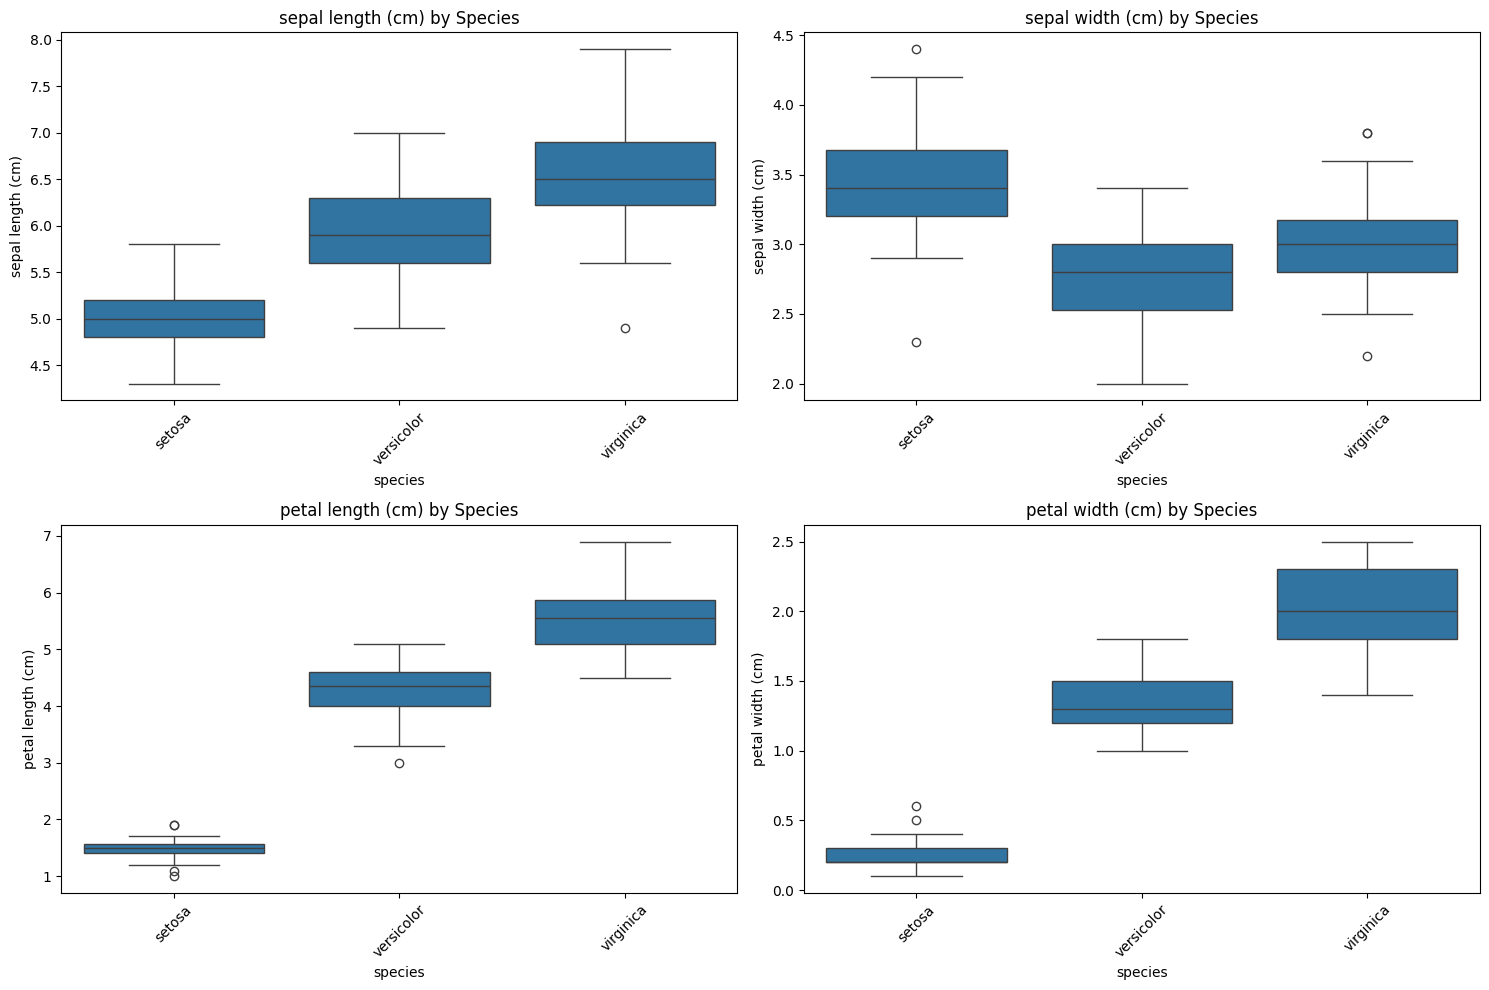

In [54]:
#install necessary libraries
#%pip install matplotlib
#%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Combine the feature data with species information, just for the sake of graphing. 
df_with_species = df.copy()
df_with_species['species'] = pd.Series(target).map({0:'setosa', 1:'versicolor', 2:'virginica'})

#Create box plots for each feature by species
plt.figure(figsize=(15, 10))

#Loop through each feature and create a box plot
for i, feature in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=df_with_species)
    plt.title(f'{feature} by Species')
    plt.xticks(rotation=45)

#Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Here we can see some important trends for the flowers and what we can expect each type of flower to be based on measurements. 

- Setosa's end up having smaller petals in terms of length and width. While the sepals for the Setosa's are shorter in length than other Iris species, they are actually the largest in terms of width.
- In terms of sepal length, petal length, and petal width, Versicolor had measurements in between the other two species. However, their sepal width is the smallest of any of the species
- In terms of sepal length, petal length, and petal width, Virginica had measurements larger than the other two species on average. However, their sepal width measurements are in between the other two species.


While sepal width does vary for these plants, the remaining measurements show a pattern. The shortest measurements end up belonging to the Setosa, the average measurements to the Versicolor, and the larges to the Virginica. Keeping this in mind, we can move on to splitting the data.

## 4. Train-Test Split

Before we build our model, likely a logistic regression model, to predict and classify flower types for us, we need to split our data into training and testing data. We do this so while the model is 'learning' how to predict with the training data, we can later find out how accurately it can predict the testing data.

As such, we'll start by spliting our dataframe into training and testing using the train-test split module from sklearn. Typically we'd need to split the target from the data, but it's already done in this case.

In [55]:
#Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(df, target, test_size=0.2, random_state=64)

## 5. Feature Creation and Scaling

### Creating Polynomial features

Creating polynomial features is a powerful way to help our model capture relationships between variables that are more complex than simple straight lines. By taking the original measurements such as sepal length and petal width, and generating new features that are products or squares of these values, we enable the classifier to pick up on patterns that might involve combinations or interactions between the flower’s physical traits. For example, the product of petal length and petal width could highlight subtle differences between species that aren’t obvious from either measurement alone.

The reason we create polynomial features on this project as opposed to something like predicting housing prices is because of the fact that the Iris dataset consists of purely numerical values, all of them same units. Creating polynomial features would reveal patterns here that wouldn't otherwise be visible. Additionally now that we have the training and testing data separate, we can create the features based on the training data only, so that the model won't "cheat", and try to learn from the testing data.

To do this, we use Sklearn’s PolynomialFeatures transformer, which systematically generates all combinations of our original features up to a specified degree. These newly engineered features expand the set of patterns that our classification model can recognize, potentially leading to improved performance, especially if species differences depend on combinations of traits rather than just individual measurements.


In [56]:
#import necessary libraries
from sklearn.preprocessing import PolynomialFeatures

#Create an instance of the function#create an instance of the transformer
#degree 2 means you’ll get all original features, their squares, and all pairwise products.
#include_bias=False means we leave out the all-ones column.
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit on train, transform train
X_train_poly = poly.fit_transform(X_train)  

# Transform test using same poly object
X_val_poly = poly.transform(X_val)        


### Scaling the data

For the same reason we waited to create the polynomial features, we also waited to scale the data. 

To make sure that each feature contributes equally to our classification model, we scale the continuous variables, which is our measurements, so they all have a similar range and distribution. 

This step is crucial because, without scaling, features measured in larger units (like petal length) could dominate those with smaller values, skewing the model’s learning process. By normalizing these variables, typically so they have mean zero and and a standard deviation of one, we help the model interpret all features on an even playing field, which can lead to better performance, especially when using algorithms sensitive to feature scale. 

In our case, the Iris dataset’s continuous variables include sepal length, sepal width, petal length, and petal width, since all of these are measured as numeric values. We’ll use a scaler from Sklearn, fitting it on the training data and applying the same transformation to the test data, so we avoid any information leaking from test to train.

In [57]:
#Import necessary libraries
from sklearn.preprocessing import StandardScaler

#Create an instance of the scaler
scaler = StandardScaler()

#Fit the scaler on the training data and transform both train and validation sets
X_train_final = scaler.fit_transform(X_train_poly)
X_val_final = scaler.transform(X_val_poly)


With this, our values have been scaled so that there is no bias towards larger values in the dataset.

## 6. Building and Training the Models

Now that we are finally at the point of building the model, we should also decide which model to use. In this case, our best option is a logistic regression as they are simple, quick, easy to interpret, and perfect for predicting our now encoded target dataframe.

Thanks to Sklearn, we can do these steps quickly. Just have to import the proper functions. 

In [58]:
#Create the model. max_iter makes sure we give it enough time to converge. 
#We'll use the same random states from our previous train_test_split.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=64)

Setting max_iter=1000 when creating our logistic regression model tells the algorithm how many times it’s allowed to update its internal weights as it tries to “learn” from the data. In other words, this parameter sets an upper limit on the number of optimization steps during the training process. Having a lower limit can possibly cause the model to stop updating weights at an unoptimal time, giving more priority to the wrong features. This is also what is meant by giving it more time to "converge". 

### Training the model

Also just one line thanks to the Sklearn library having done the heavy lifting for us. Here, we'll fit, or train the model on the training data. This step is where the model “learns” from the historical data and tries to find patterns that help it predict the target.


In [59]:
#Fit the model on the training data. Thankfully, also not a lot of work thanks to Sklearn. Thank you Python.
model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=64)

## 7. Evaulating the models

At this point, the model has been built and trained. It has learned from the data, and ideally has found the best weights for predicting the flower types. However, it is important to make sure to test the model now, as there is a chance the model might have just "memorized" the data as opposed to "learning" from it. 

We'll also display some metrics of success so that we can understand how well it is doing. We'll be importing the  metrics from Sklearn and see how well our model does in classifying the flowers.

In [61]:
#Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Make predictions on the validation set, and store it in a variable. 
y_pred = model.predict(X_val_final)

#Check the accuracy of our predictions
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

#Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

#Print the classification report for more details
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Analysis
#### Confusion Matrix
The confusion matrix breaks down the classifier’s predictions for each of the three iris species. Each row represents the actual class, and each column represents the predicted class. The diagonal elements show the number of correct predictions for each species:

- The top-left (class 0, setosa) is a perfect 10/10, showing the model never confused setosa for another species.

- The middle row (class 1, versicolor) shows 9 correct predictions and 1 misclassified as class 2 (virginica), meaning the model had just a single mix-up between these two visually similar classes.

- The bottom row (class 2, virginica) is also perfect: all 10 virginica samples were correctly identified.

Overall, the matrix tells us the model is making correct predictions almost every time, with just one misclassification between versicolor and virginica.

#### Classification Report
Precision, recall, and F1-score provide more context for each species:

- Precision: For setosa and versicolor, the model is perfect; for virginica, it’s still strong at 0.91. High precision means that when the model predicts a species, it’s usually right.

- Recall: The model catches all setosa and virginica, but misses one versicolor (recall 0.90). This suggests the model may occasionally confuse versicolor with virginica, but never with setosa.

- F1-score: The F1-scores are 0.95 or above for every class, reflecting strong overall performance.

The macro and weighted averages for all metrics are 0.97, showing the model’s balanced ability to classify all three species, not just favoring one.

#### Classification Report Analysis
Overall Accuracy: The model achieved an accuracy of 0.97 (97%), meaning it correctly classified 29 out of 30 flowers in the validation set.
Per-class Performance:

- Class 0 (setosa): Flawless performance across all metrics—precision, recall, and F1-score are all 1.00.

- Class 1 (versicolor): Precision is perfect at 1.00, but recall drops to 0.90 due to one sample being misclassified as virginica.

- Class 2 (virginica): Recall is perfect (no missed virginicas), precision is 0.91 (reflecting one sample that was predicted as virginica but was actually versicolor).

Support: Each class had 10 samples, so the evaluation is nicely balanced.

#### Possible Overfitting?
One of the first lessons in data science is that there is a chance that models that are "insanely accurate" are simply just overfitting. Cheating by memorizing the answers, or hard coding said answers

However, the model’s near-perfect performance isn’t too surprising given the characteristics of the Iris dataset: the three classes are well separated in feature space, and the dataset is relatively small. With an 80-20 train-test split, each test set has just 30 examples (10 per class), so even a single mistake shifts the metrics.
It’s worth noting that while these results look “insanely accurate,” this is typical for classic models on simple datasets such as the Iris dataset, so this high score means you’re doing things right, not that the task is suspiciously easy. For example, due to the linear relationships in measurements we saw in graphs, models like logistic regressions have no issue classifying Setosas, and more often than not are able to correctly identify the other two flower species. 

Overall? The model is classifying iris species with remarkable accuracy, making only a single error between two visually similar types. The confusion matrix and classification report both show that the model is learning meaningful patterns and not just guessing or favoring one class. Congratulations! You’ve built a model that sets the standard for introductory classification tasks!